In [194]:
import pandas as pd
import numpy as np
from pandas import Timedelta
from datetime import timedelta
from sklearn.datasets import load_wine
from sklearn.ensemble import GradientBoostingClassifier

In [195]:
df = pd.read_pickle("../seatunnel.pkl")
df = df.drop_duplicates()

In [196]:
df

,begin_sha,end_sha,commits,additions,deletions,changed_files,total_time,begin_time,begin_key,begin_revision,...,end_java:S5411,end_java:S5413,end_java:S5803,end_java:S5869,end_java:S5993,end_java:S6202,end_java:S6213,end_java:S6244,end_java:S6353,end_java:S6355
0,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,4d429cab55482986b4d8a24c699d315631c8242a,1,64,1,1,0 days 00:33:23,2023-06-06T08:28:39Z,seatunnel-c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1f...,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,...,13,0,1,2,42,0,106,1,0,0
1,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,4d429cab55482986b4d8a24c699d315631c8242a,1,64,1,1,0 days 00:33:23,2023-06-02T07:23:42Z,seatunnel-c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1f...,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,...,13,0,1,2,42,0,106,1,0,0
2,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,c30a2a1b1c989d71082e7d501752f0d2d2c3601f,2,11,19,3,4 days 01:37:00,2023-06-06T08:28:39Z,seatunnel-c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1f...,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,...,13,0,1,2,42,0,106,1,0,0
3,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,c30a2a1b1c989d71082e7d501752f0d2d2c3601f,2,11,19,3,4 days 01:37:00,2023-06-02T07:23:42Z,seatunnel-c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1f...,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,...,13,0,1,2,42,0,106,1,0,0
4,bde19b6377f7b2fb7a34b94bd06d6ce0cc44f348,c7745e63373c0fc92884982844bf55e22dd38af5,1,6,2,1,0 days 17:17:51,2023-06-05T08:59:42Z,seatunnel-bde19b6377f7b2fb7a34b94bd06d6ce0cc44...,bde19b6377f7b2fb7a34b94bd06d6ce0cc44f348,...,13,0,1,2,42,0,106,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,04addef64bbd2567d47acbb7f434245fba7ac8a5,3b6a8b4058593b1ff11c44560ebcc56142cda830,1,11,1128,27,0 days 00:33:35,2019-08-13T15:14:02Z,seatunnel-04addef64bbd2567d47acbb7f434245fba7a...,04addef64bbd2567d47acbb7f434245fba7ac8a5,...,0,0,0,0,0,0,0,0,0,0
5216,79339df3455c88ba606847d79b3b3a1682c97a67,04addef64bbd2567d47acbb7f434245fba7ac8a5,1,36,0,1,0 days 00:09:14,2019-08-13T02:16:57Z,seatunnel-79339df3455c88ba606847d79b3b3a1682c9...,79339df3455c88ba606847d79b3b3a1682c97a67,...,0,0,0,0,0,0,0,0,0,0
5217,a475a8082b030af51a03e61457ed78b7cf17ab56,a26d21b7d28704facbfbbecfb501b958dd59d826,6,997,1045,81,0 days 23:14:31,2019-08-13T01:54:31Z,seatunnel-a475a8082b030af51a03e61457ed78b7cf17...,a475a8082b030af51a03e61457ed78b7cf17ab56,...,0,0,0,0,0,0,0,0,0,0
5218,96d0637c8471ec9370f15a522db0b23ff5dc7669,5fa746466941d871d4b1246b451f398416952541,14,964,122,64,31 days 01:05:35,2019-08-10T13:15:19Z,seatunnel-96d0637c8471ec9370f15a522db0b23ff5dc...,96d0637c8471ec9370f15a522db0b23ff5dc7669,...,0,0,0,0,0,0,3,0,0,0


In [197]:
# time_median= df['total_time'].median()
# time_median
# Timedelta('1 days 00:38:47')

In [198]:
df['total_time'][0:20].median()

Timedelta('3 days 01:27:48')

In [199]:
df['total_time'] = pd.to_datetime(df['end_time']) - pd.to_datetime(df['begin_time'])

In [200]:
df['total_time'] < timedelta(minutes=3)

0       False
1       False
2       False
3       False
4       False
        ...  
5215    False
5216    False
5217    False
5218    False
5219    False
Name: total_time, Length: 5208, dtype: bool

In [201]:
# time_median > timedelta(minutes=0)

In [202]:
df['time_binary'] = df['total_time'].apply(lambda x:  0 if x < timedelta (days = 3) else 1)

In [203]:
df

,begin_sha,end_sha,commits,additions,deletions,changed_files,total_time,begin_time,begin_key,begin_revision,...,end_java:S5413,end_java:S5803,end_java:S5869,end_java:S5993,end_java:S6202,end_java:S6213,end_java:S6244,end_java:S6353,end_java:S6355,time_binary
0,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,4d429cab55482986b4d8a24c699d315631c8242a,1,64,1,1,0 days 00:33:23,2023-06-06T08:28:39Z,seatunnel-c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1f...,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,...,0,1,2,42,0,106,1,0,0,0
1,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,4d429cab55482986b4d8a24c699d315631c8242a,1,64,1,1,4 days 01:38:20,2023-06-02T07:23:42Z,seatunnel-c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1f...,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,...,0,1,2,42,0,106,1,0,0,1
2,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,c30a2a1b1c989d71082e7d501752f0d2d2c3601f,2,11,19,3,0 days 00:32:03,2023-06-06T08:28:39Z,seatunnel-c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1f...,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,...,0,1,2,42,0,106,1,0,0,0
3,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,c30a2a1b1c989d71082e7d501752f0d2d2c3601f,2,11,19,3,4 days 01:37:00,2023-06-02T07:23:42Z,seatunnel-c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1f...,c203ef5f8d6ad8bfb7f284e32a9ce5f2bc1fe142,...,0,1,2,42,0,106,1,0,0,1
4,bde19b6377f7b2fb7a34b94bd06d6ce0cc44f348,c7745e63373c0fc92884982844bf55e22dd38af5,1,6,2,1,0 days 17:17:51,2023-06-05T08:59:42Z,seatunnel-bde19b6377f7b2fb7a34b94bd06d6ce0cc44...,bde19b6377f7b2fb7a34b94bd06d6ce0cc44f348,...,0,1,2,42,0,106,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,04addef64bbd2567d47acbb7f434245fba7ac8a5,3b6a8b4058593b1ff11c44560ebcc56142cda830,1,11,1128,27,0 days 00:33:35,2019-08-13T15:14:02Z,seatunnel-04addef64bbd2567d47acbb7f434245fba7a...,04addef64bbd2567d47acbb7f434245fba7ac8a5,...,0,0,0,0,0,0,0,0,0,0
5216,79339df3455c88ba606847d79b3b3a1682c97a67,04addef64bbd2567d47acbb7f434245fba7ac8a5,1,36,0,1,0 days 00:09:14,2019-08-13T02:16:57Z,seatunnel-79339df3455c88ba606847d79b3b3a1682c9...,79339df3455c88ba606847d79b3b3a1682c97a67,...,0,0,0,0,0,0,0,0,0,0
5217,a475a8082b030af51a03e61457ed78b7cf17ab56,a26d21b7d28704facbfbbecfb501b958dd59d826,6,997,1045,81,0 days 23:14:31,2019-08-13T01:54:31Z,seatunnel-a475a8082b030af51a03e61457ed78b7cf17...,a475a8082b030af51a03e61457ed78b7cf17ab56,...,0,0,0,0,0,0,0,0,0,0
5218,96d0637c8471ec9370f15a522db0b23ff5dc7669,5fa746466941d871d4b1246b451f398416952541,14,964,122,64,31 days 01:05:35,2019-08-10T13:15:19Z,seatunnel-96d0637c8471ec9370f15a522db0b23ff5dc...,96d0637c8471ec9370f15a522db0b23ff5dc7669,...,0,0,0,0,0,3,0,0,0,1


In [204]:
df['total_time']

0       0 days 00:33:23
1       4 days 01:38:20
2       0 days 00:32:03
3       4 days 01:37:00
4       0 days 17:17:51
             ...       
5215    0 days 00:33:35
5216    0 days 00:09:14
5217    0 days 23:14:31
5218   31 days 01:05:35
5219    0 days 17:01:00
Name: total_time, Length: 5208, dtype: timedelta64[ns]

In [205]:
X = df.loc[:, ~df.columns.isin(['time_binary',
                                'total_time' ,
                                'begin_sha', 'end_sha', 'begin_time' , 'begin_key', 'begin_revision', 'end_time', 'end_key', 'end_revision'])]
y = df['time_binary']

In [206]:
X

,commits,additions,deletions,changed_files,begin_java:S100,begin_java:S101,begin_java:S106,begin_java:S1066,begin_java:S1068,begin_java:S107,...,end_java:S5411,end_java:S5413,end_java:S5803,end_java:S5869,end_java:S5993,end_java:S6202,end_java:S6213,end_java:S6244,end_java:S6353,end_java:S6355
0,1,64,1,1,0,0,8,16,64,27,...,13,0,1,2,42,0,106,1,0,0
1,1,64,1,1,0,0,8,16,64,27,...,13,0,1,2,42,0,106,1,0,0
2,2,11,19,3,0,0,8,16,64,27,...,13,0,1,2,42,0,106,1,0,0
3,2,11,19,3,0,0,8,16,64,27,...,13,0,1,2,42,0,106,1,0,0
4,1,6,2,1,0,0,8,16,64,27,...,13,0,1,2,42,0,106,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,1,11,1128,27,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
5216,1,36,0,1,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
5217,6,997,1045,81,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5218,14,964,122,64,0,0,1,0,0,0,...,0,0,0,0,0,0,3,0,0,0


In [207]:
y

0       0
1       1
2       0
3       1
4       0
       ..
5215    0
5216    0
5217    0
5218    1
5219    0
Name: time_binary, Length: 5208, dtype: int64

In [208]:
X_train, X_test = X[:int(0.7 * len(X))], X[int(0.7 * len(X)):]
y_train, y_test = y[:int(0.7 * len(X))], y[int(0.7 * len(X)):]

In [209]:
int(0.7 * len(X))

3645

In [210]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1 , max_depth=10 , random_state=3).fit(X_train , y_train)

In [211]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf , X , y , cv=5 , scoring= "accuracy")

array([0.29270633, 0.11228407, 0.00767754, 0.129683  , 0.70989433])

In [212]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf,X,y,cv=5)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [213]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y , y_pred)

array([[ 913, 2773],
       [1131,  391]], dtype=int64)

In [214]:
clf.predict(X)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [215]:
clf.predict(X_train)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [216]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision = ', precision_score(y,y_pred ,average='macro'))
print('recall_score = ', recall_score(y,y_pred ,average='macro'))
print('f1_score',f1_score(y,y_pred ,average='macro'))


precision =  0.28512546975390957
recall_score =  0.2522963972783334
f1_score 0.24277685787898898


In [217]:
frame={"y":y,"y_pred": y_pred}
pd.DataFrame(frame).sum()

y         1522
y_pred    3164
dtype: int64

In [218]:
from sklearn.model_selection import GridSearchCV

parameters = {

    'learning_rate': [0.01 , 0.1 ,1.0],
    'n_estimators': [1,12,14,16],
    'subsample' : [0.7],
    'max_depth' : [1,2] ,
    'random_state':[2]

}
GradientBoosting = GradientBoostingClassifier()
clf = GridSearchCV(GradientBoosting, parameters , cv=3 , scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [1, 2],
                         'n_estimators': [1, 12, 14, 16], 'random_state': [2],
                         'subsample': [0.7]},
             scoring='f1_macro')

In [219]:
y_pred = cross_val_predict(clf.best_estimator_,X_test,y_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [220]:
y_pred_clf = clf.best_estimator_.predict(X_test)
y_pred_clf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [221]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision = ', precision_score(y_test,y_pred_clf ,average='macro'))
print('recall_score = ', recall_score(y_test,y_pred_clf ,average='macro'))
print('f1_score',f1_score(y_test,y_pred_clf ,average='macro'))

precision =  0.4049904030710173
recall_score =  0.5
f1_score 0.447507953340403


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [222]:
from sklearn.model_selection import GridSearchCV

parameters = {

    'learning_rate': [0.01 , 0.1 ,1],
    'n_estimators': [12,14,16],
    'subsample' : [0.7],
    'max_depth' : [2] ,
    'random_state':[2]

}
GradientBoosting = GradientBoostingClassifier()
clf = GridSearchCV(GradientBoosting, parameters , cv=3 , scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1], 'max_depth': [2],
                         'n_estimators': [12, 14, 16], 'random_state': [2],
                         'subsample': [0.7]},
             scoring='f1_macro')

In [223]:
import itertools

In [224]:
# result = itertools.combinations(X ,2)
#
# for item in result:
#     df  = pd.DataFrame(item)
#     X[list (item)]
#     parameters = {
#     'learning_rate': [0.01 , 0.1 ,1],
#     'n_estimators': [12,14,16],
#     'subsample' : [0.7],
#     'max_depth' : [2] ,
#     'random_state':[2]
#     }
#     GradientBoosting = GradientBoostingClassifier()
#     clf = GridSearchCV(GradientBoosting , parameters , cv=3 , scoring='f1_macro')
#     clf.fit(X_train[list (item)],y_train)
#     clf.predict(X_test[list (item)])
    #print('predict=',clf.predict(X_test[list (item)]))
    #print(X_test)
    #print("y_train = ",y_train)
    # print(item)
    # print("precision_score =",precision_score(clf.predict(X[list(item)]),y))
    #print("recall_score =", recall_score(clf.predict(X[list(item)]),y))
    #print("f_1=",f1_score(clf.predict(X[list(item)]),y,average='macro'))
    #print("f_1_X-test=",f1_score(clf.predict(X_test[list(item)]),y_test,average='macro'))

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

ValueError: x and y must be the same size

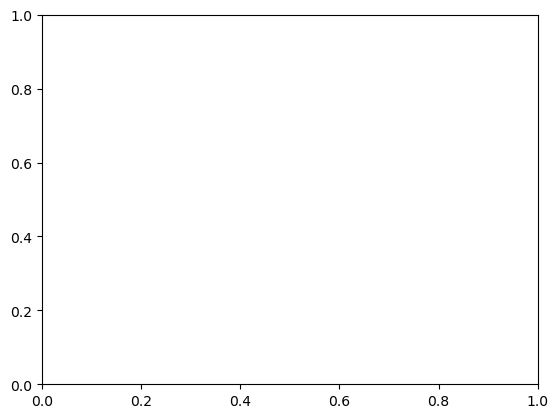

In [226]:
plt.scatter(X , y)

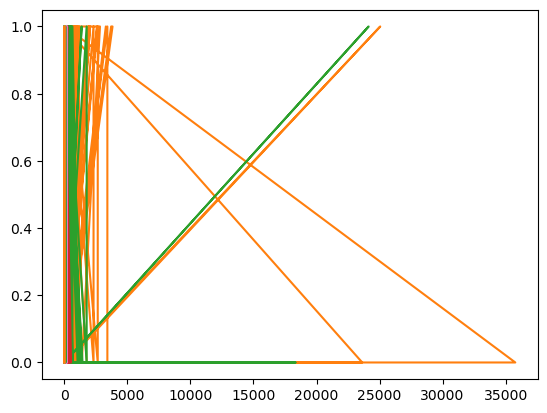

In [227]:
plt.plot(X_test,y_test)

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score -1.8052383630847597
